# Regresión Logistica

Este cuaderno contiene el código para la implementación de modelos de regresión logística en Python.

In [ ]:
# Cargar librerias para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Modulos librerias para aprendizaje de maquina
from sklearn.linear_model import LogisticRegression # Regresión logística
from yellowbrick.model_selection import feature_importances
from sklearn.model_selection import train_test_split # División train/test
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Matriz de confusión
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score # Métricas de clasificación
from sklearn.metrics import classification_report # Reporte de métricas de clasificación

pd.set_option('display.max_columns', None)


In [ ]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Analitica de Datos UJaveriana')

# Verificar los archivos de las carpetas
!ls

'1. Analisis Exploratorio.ipynb'   gastos_medicos.xlsx
'2. Modelo de Regresion.ipynb'	   graficas_analisis_presentacion.ipynb
 3.Regresion_Logistica.ipynb	   incumplimiento_credito.csv
 bank_marketing.csv		   Modelos_Machine_Learning.ipynb
 credit_card_default.csv	   predicciones.xlsx
 cupones.csv			   publicidad.csv
 cupones.xlsx			   Taller_Regresion_Lineal.ipynb


## Caso. Estrategia de promoción

**Contexto**

Una cadena nacional de ropa realizará una promoción por correo. Ha ordenado imprimir copias de su catálogo y en cada uno incluye un cupón de USD 50 de descuento en compras por USD 200 o más. La cadena desea enviarlo sólo a aquellos clientes que tengan mayor probabilidad de usar el cupón.
La gerencia considera que:

* La cantidad gastada anualmente por el cliente ($X_1$)
* Si posee o no una tarjeta de crédito de la tienda ($X_2$)

Son dos variables útiles para predecir si ese cliente usará el cupón.
Realiza un testeo con 32 clientes para obtener datos.

**Objetivo**

* Verificar si el gasto anual y la tenencia de una tarjeta de crédito permite explicar y predecir el uso de los cupones promocionales.
* Desarrollar un modelo de *regresión logística* que le permita predecir si un cliente utilizará o no un cupón.
* Analizar la contribución de las variables en el uso de los cupones.
* Evaluar la capacidad predictiva del modelo de regresión logística.

In [ ]:
# Cargar datos
datos = pd.read_csv("cupones.csv")
datos.head()

,cliente,gasto,tarjeta,cupon
0,1,2.29,1,1
1,2,3.22,1,0
2,3,2.14,1,1
3,4,3.92,0,1
4,5,2.53,1,1


### Análisis exploratorio

In [ ]:
# Clientes que utilizan el cupón
datos['cupon'].value_counts()

1    19
0    13
Name: cupon, dtype: int64

<Axes: >

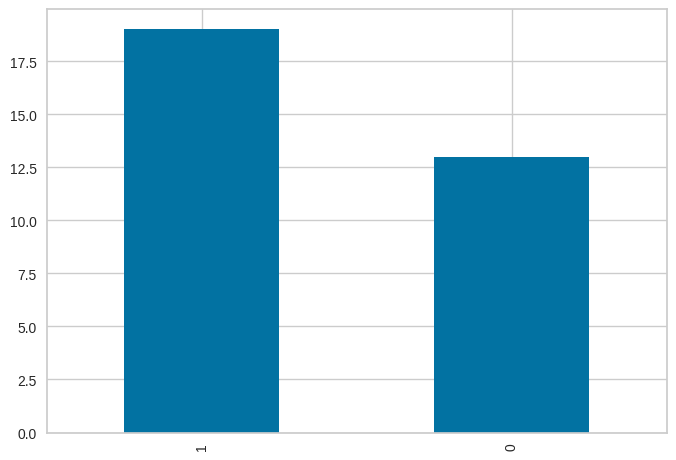

In [ ]:
# Clientes que utilizan el cupón
datos['cupon'].value_counts().plot.bar()

In [ ]:
# Resumen estadístico del gasto anual de los clientes
datos['gasto'].describe()

count    32.000000
mean      3.826250
std       1.985793
min       1.060000
25%       2.215000
50%       3.370000
75%       5.577500
max       7.710000
Name: gasto, dtype: float64

In [ ]:
# Clientes con tarjeta de credíto
datos['tarjeta'].value_counts(normalize=True)

1    0.53125
0    0.46875
Name: tarjeta, dtype: float64

In [ ]:
# Gasto anual vs uso del cupón
datos.groupby('cupon')['gasto'].describe()

,count,mean,std,min,25%,50%,75%,max
cupon,,,,,,,,
0,13.0,3.274615,1.838245,1.06,1.92,2.47,4.800,6.08
1,19.0,4.203684,2.041680,1.15,2.41,3.92,5.835,7.71


Text(0.5, 1.0, 'Gasto anual vs Uso del cupón')

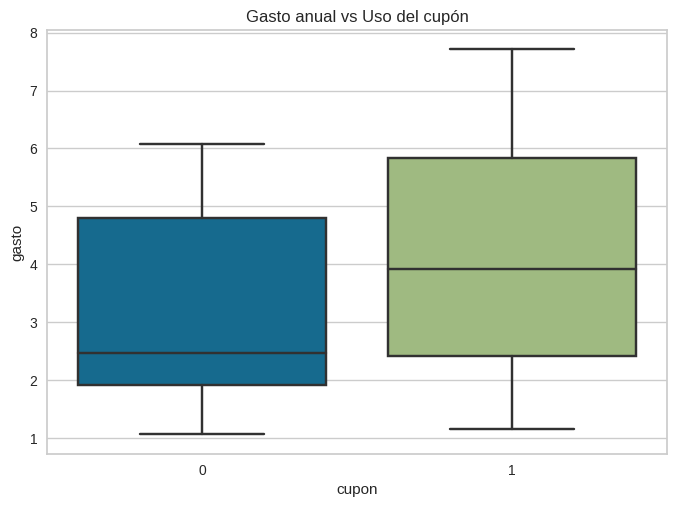

In [ ]:
# Gasto anual vs uso del cupón
sns.boxplot(data=datos, x='cupon', y='gasto')
plt.title("Gasto anual vs Uso del cupón")

In [ ]:
# Tarjeta de crédito vs cupon
datos.pivot_table(index='tarjeta', columns='cupon', values='gasto', aggfunc='count').apply(lambda df: df/df.sum(), axis=1)

cupon,0,1
tarjeta,,
0,0.600000,0.400000
1,0.235294,0.764706


Text(0, 0.5, 'Proporción de clientes')

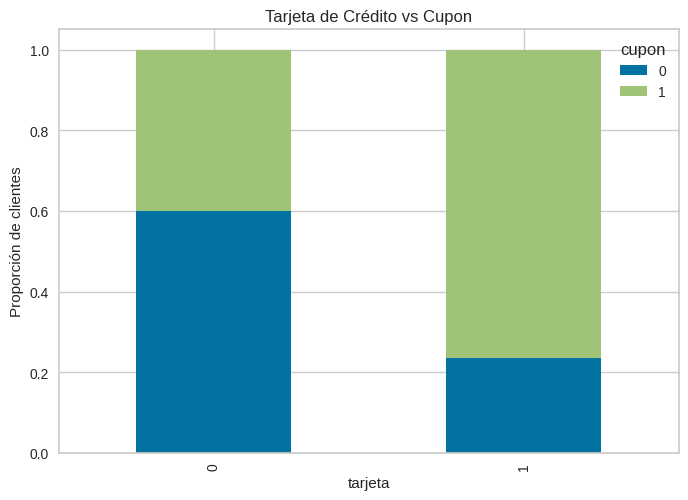

In [ ]:
# Tarjeta de crédito vs cupon
(
    datos.pivot_table(index='tarjeta', columns='cupon', values='gasto', aggfunc='count')
    .apply(lambda df: df/df.sum(), axis=1)
    .plot
    .bar(stacked=True)
)
plt.title("Tarjeta de Crédito vs Cupon")
plt.ylabel("Proporción de clientes")

### Regresión Logística para predecir el uso de cupones

In [ ]:
# Seleccionar variable Y: cupon
Y = datos['cupon']

# Seleccionar variables X: tarjeta y gasto
X = datos[['gasto','tarjeta']]

In [ ]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=777)

In [ ]:
X_train.shape

(22, 2)

In [ ]:
X_test.shape

(10, 2)

In [ ]:
# Crear y entregar la regresión logística
lr_cupon = LogisticRegression(penalty=None, random_state=777)
lr_cupon.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=777)

In [ ]:
lr_cupon.coef_

array([[0.68635533, 3.43343659]])

In [ ]:
# Coeficientes
coeficientes = pd.DataFrame()
coeficientes['variables'] = lr_cupon.feature_names_in_
coeficientes['coeficientes'] = lr_cupon.coef_[0]
coeficientes

,variables,coeficientes
0,gasto,0.686355
1,tarjeta,3.433437


In [ ]:
# Constante (Intercepto)
lr_cupon.intercept_

array([-4.25876836])

Con estos resultados la regresión logística tiene la siguiente forma:

\begin{equation}
P(Y = 1 | X_1, X_2) = \frac{e^{-4.2588 + 0.6864X_1 + 3.4334X_2}}{1 + e^{-4.2588 + 0.6864X_1 + 3.4334X_2}}
\end{equation}

### Desempeño de la regresión logística

In [ ]:
# Predicción de las probabilidad de utilizar el cupon
# La primera columna es para Y = 0 y la segunda para Y = 1
lr_cupon.predict_proba(X_test)

array([[0.94983478, 0.05016522],
       [0.61051946, 0.38948054],
       [0.82753477, 0.17246523],
       [0.50385804, 0.49614196],
       [0.4884172 , 0.5115828 ],
       [0.271575  , 0.728425  ],
       [0.48711707, 0.51288293],
       [0.72397447, 0.27602553],
       [0.87647645, 0.12352355],
       [0.04878983, 0.95121017]])

In [ ]:
# Predicciones del uso del cupon para el conjunto de prueba
prediccion = pd.DataFrame()
prediccion['cupon'] = y_test
prediccion['prediccion'] = lr_cupon.predict(X_test) # Prediccion de clases
prediccion['probabilidad P(Y=1)'] = lr_cupon.predict_proba(X_test)[:,1]
prediccion

,cupon,prediccion,probabilidad P(Y=1)
11,0,0,0.050165
10,0,0,0.389481
3,1,0,0.172465
8,1,0,0.496142
26,0,1,0.511583
24,1,1,0.728425
19,1,1,0.512883
28,0,0,0.276026
9,1,0,0.123524
30,1,1,0.951210


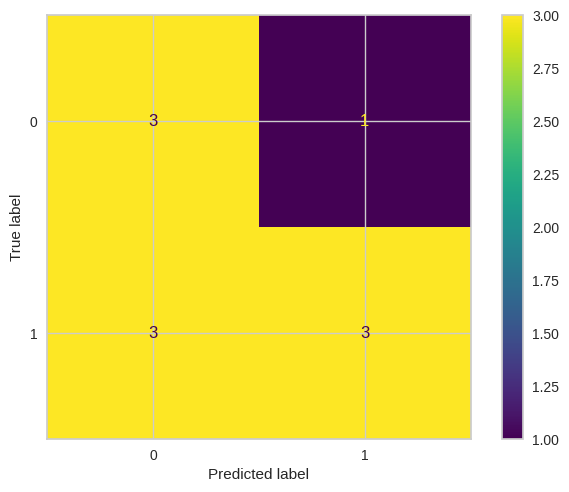

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_true=prediccion['cupon'], y_pred=prediccion['prediccion'], labels=lr_cupon.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_cupon.classes_)
disp_cm.plot()

In [ ]:
# Accuracy
accuracy_score(y_true=prediccion['cupon'], y_pred=prediccion['prediccion'])

0.6

**Accuracy: En solo en 6 de las 10 predicciones el modelo acertó (60%)**

In [ ]:
# Recall (Sensibilidad)
recall_score(y_true=prediccion['cupon'], y_pred=prediccion['prediccion'])

0.5

**Recall: De los 6 clientes que usaron el cupón, el modelo detectó 3 (50%)**

In [ ]:
# Precision
precision_score(y_true=prediccion['cupon'], y_pred=prediccion['prediccion'])

0.75

**Precision: El modelo predijo que 4 clientes usarían el cupón, pero solo 3 lo hicieron (75%)**

In [ ]:
# F1 score
f1_score(y_true=prediccion['cupon'], y_pred=prediccion['prediccion'])

0.6

El F1-score en este caso es igual a 0.6, lo que indica que el modelo tiene un rendimiento razonablemente equilibrado entre precisión y recuperación en la predicción de clientes que usarán el cupón.

Un F1-score de 1 sería el mejor resultado posible, lo que significaría que el modelo tiene una precisión y una recuperación perfectas. En este caso, un F1-score de 0.6 sugiere que el modelo es capaz de predecir razonablemente bien cuáles clientes usarán el cupón, pero todavía hay margen para mejorar su rendimiento.

In [ ]:
# Reporte general
print(classification_report(y_true=prediccion['cupon'], y_pred=prediccion['prediccion']))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.75      0.50      0.60         6

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



El *classification report* proporciona una descripción detallada de las métricas de evaluación de un modelo de clasificación, como la precisión, el recall (exhaustividad) y el F1-score, para cada una de las clases en el conjunto de datos.

Para la clase 0:

* Precisión (precision): 0.50, lo que significa que el 50% de las predicciones de la clase 0 son correctas.
* Recuperación (recall): 0.75, lo que significa que el 75% de las instancias reales de la clase 0 fueron detectadas por el modelo.
* F1-score: 0.60, una medida combinada que tiene en cuenta tanto la precisión como el recall.
* Soporte (support): 4, que indica que hay 4 instancias de la clase 0 en el conjunto de datos.

Ya para clase 1 analizamos los resultados.

## Caso. Incumplimiento en pago de tarjeta de crédito

**Contexto:** Este conjunto de datos contiene información de sobre incumplimientos de pagos en creditos, y entrega información de los clientes de acuerdo a factores demográficos, datos crediticios, historial de pagos y estados de cuenta de tarjetas de crédito.

**Objetivo:** Entrenar un clasificador que permita estimar el riesgo de default de un cliente.

In [ ]:
datos_credito = pd.read_csv("incumplimiento_credito.csv")
datos_credito.head()

,saldo_cuenta(millones),duracion_prestamo_meses,historial_crediticio,proposito,monto(millones),saldo_ahorros(millones),antiguedad_empleo,tasa_cuotas,estado_personal,otros_deudores,historial_residencia,propiedad,edad,plan_cuotas,vivienda,creditos_existentes,trabajo,dependientes,telefono,trabajador_extranjero,incumplimiento
0,< 1M,6,crítico,radio/televisión,1169,desconocido,> 7 años,4,hombre soltero,ninguno,4,bienes raíces,67,ninguno,propia,2,empleado calificado,1,sí,sí,0
1,1M - 10M,48,pagado,radio/televisión,5951,< 1M,1 - 4 años,2,mujer,ninguno,2,bienes raíces,22,ninguno,propia,1,empleado calificado,1,ninguno,sí,1
2,desconocido,12,crítico,educación,2096,< 1M,4 - 7 años,2,hombre soltero,ninguno,3,bienes raíces,49,ninguno,propia,1,residente no calificado,2,ninguno,sí,0
3,< 1M,42,pagado,muebles,7882,< 1M,4 - 7 años,2,hombre soltero,aval,4,sociedad de ahorros y préstamos,45,ninguno,gratuita,1,empleado calificado,2,ninguno,sí,0
4,< 1M,24,retrasado,coche (nuevo),4870,< 1M,1 - 4 años,3,hombre soltero,ninguno,4,desconocido/nada,53,ninguno,gratuita,2,empleado calificado,2,ninguno,sí,1


In [ ]:
datos_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta(millones)   1000 non-null   object
 1   duracion_prestamo_meses  1000 non-null   int64 
 2   historial_crediticio     1000 non-null   object
 3   proposito                1000 non-null   object
 4   monto(millones)          1000 non-null   int64 
 5   saldo_ahorros(millones)  1000 non-null   object
 6   antiguedad_empleo        1000 non-null   object
 7   tasa_cuotas              1000 non-null   int64 
 8   estado_personal          1000 non-null   object
 9   otros_deudores           1000 non-null   object
 10  historial_residencia     1000 non-null   int64 
 11  propiedad                1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  plan_cuotas              1000 non-null   object
 14  vivienda                 1000 non-null   

### Análisis exploratorio

Seleccione cuatro variables que a priori usted consider importantes para determinar o explicar el incumplimiento en los pagos. Para estas variables presente un análisis exploratorio.

In [ ]:
# Variable 1:


In [ ]:
# Variable 2:


In [ ]:
# Variable 3:


In [ ]:
# Variable 4:


### Preparar los datos

In [1]:
# Divida variables independientes Xs y variable dependiente y


NameError: ignored

In [ ]:
# Cree las variables dummies


In [2]:
# Dividir los datos en cojunto de entrenamiento y prueba


NameError: ignored

### Entrenar el modelo

In [ ]:
# Entrenar el modelo de regresión


LogisticRegression(max_iter=1000)

In [ ]:
# Imprimir los coeficientes:


,Variables,Coeficientes
0,duracion_prestamo_meses,0.019640
1,monto(millones),0.000119
2,tasa_cuotas,0.277866
3,historial_residencia,-0.012504
4,edad,-0.023217
...,...,...
56,trabajo_residente no calificado,-0.001362
57,telefono_ninguno,-0.200436
58,telefono_sí,-0.128741
59,trabajador_extranjero_no,-0.396216


Cuando se tiene una gran cantidad de variables se puede generar una gráfica de importancia de variables:

/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


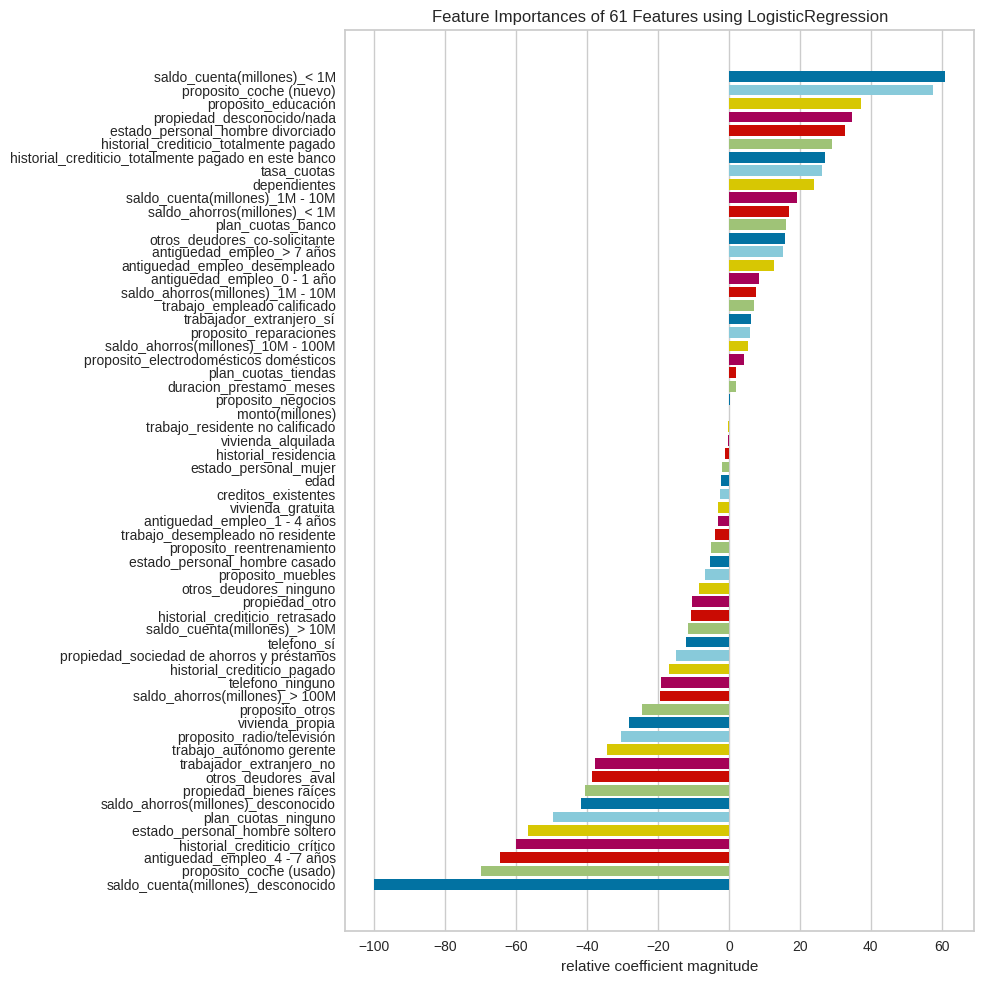

FeatureImportances(ax=<Axes: title={'center': 'Feature Importances of 61 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>,
                   estimator=LogisticRegression(max_iter=1000))

In [ ]:
# Gráfica de importancia de variables
plt.figure(figsize=(10,10))
feature_importances(LogisticRegression(max_iter=1000), X_train, y_train)

**Conclusiones**: teniendo en cuenta la gráfica de importancia de variables responda las siguiente preguntas.

**¿Cuales son las variables que más influyen en el incumplimiento del pago ($Y=1$)?**

**¿Cuales son las características de los clientes que tienen una menor probabilidad de incumplir (Y=0)?**

**Para las variables seleccionadas en el análisis exploratorio ¿En cuales se confirmó su hipótesis?**

### Desempeño de la regresión logística

In [3]:
# Generar predicciones


NameError: ignored

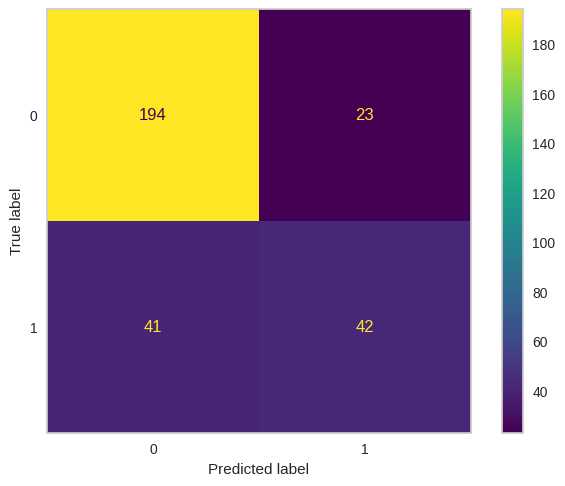

In [ ]:
# Generar matriz de confusión para conjunto de prueba


In [4]:
# Generar un reporte con las principales métricas.


NameError: ignored

**Presente un análisis de la matriz de confusión y el reporte de clasificación.**

¿Qué tanto se acierta en la predicción de incumplimientos?


¿Qué tanto fallan las predicciones (Falsas alarmas)?


¿Qué implicaciones prácticas podría tener esto para el banco?